<a href="https://colab.research.google.com/github/yusufKh7-ctrl/Bike-Sales/blob/main/bike_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/bike_data.csv")

print(f'Number of rows: {df.shape[0]}', end=' | ')
print(f'Number of columns: {df.shape[1]}')

# Columns name
print(f'Columns {df.columns.tolist()}')

# General Information
print("\nGeneral Information")
df.info()

# First 5 rows
print("\nFirst 5 rows")
print(df.head())

# Last 5 rows
print("\nLast 5 rows")
print(df.tail())

# Describe
print(df.describe())

Number of rows: 113036 | Number of columns: 18
Columns ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

General Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      1130

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Columns for Year with Month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Cheack None values
# print(df.isna().sum())

# Format Columns name
df.columns = df.columns.str.strip()


In [ ]:
# Sales Overview
print(f'Total revenue: {df['Revenue'].sum()}')
print(f'Total profit: {df['Profit'].sum()}')
print(f'Total cost: {df['Cost'].sum()}')
print(f"Average selling price per unit: {df['Unit_Cost'].mean()}")
print(f"Average price per unit: {df['Unit_Price'].mean()}")
print(f"Average quantity required in the order: {df['Order_Quantity'].mean():.4f}")

Total revenue: 85271008
Total profit: 32221100
Total cost: 53049908
Average selling price per unit: 267.296365759581
Average price per unit: 452.9384266959199
Average quantity required in the order: 11.9017


In [ ]:
print("\nSales by year:")
sales_by_year = df.groupby('Year')['Revenue'].sum().reset_index()
print(sales_by_year)


Sales by year:
   Year   Revenue
0  2011   8964888
1  2012   9175983
2  2013  15240037
3  2014  14152724
4  2015  20023991
5  2016  17713385


In [ ]:
print("The countries that purchase the most (by revenue):")
print(df.groupby('Country')['Revenue'].sum().sort_values(ascending=False))

print("\nNumber of requests by country:")
print(df['Country'].value_counts())

The countries that purchase the most (by revenue):
Country
United States     27975547
Australia         21302059
United Kingdom    10646196
Germany            8978596
France             8432872
Canada             7935738
Name: Revenue, dtype: int64

Number of requests by country:
Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64


In [ ]:
print("Revenue by age group:")
print(df.groupby("Age_Group")['Revenue'].sum().sort_values(ascending=False))

print("\nNumber of requests by age group:")
print(df['Age_Group'].value_counts().sort_values(ascending=False))

print("\nAverage profit by age group")
print(df.groupby("Age_Group")['Profit'].mean().sort_values(ascending=False))

Revenue by age group:
Age_Group
Adults (35-64)          42584153
Young Adults (25-34)    30655614
Youth (<25)             11723199
Seniors (64+)             308042
Name: Revenue, dtype: int64

Number of requests by age group:
Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

Average profit by age group
Age_Group
Young Adults (25-34)    294.581699
Adults (35-64)          292.375717
Youth (<25)             245.377608
Seniors (64+)           189.267123
Name: Profit, dtype: float64


In [ ]:
print("Revenue by gender")
print(df.groupby("Customer_Gender")['Revenue'].sum().sort_values(ascending=False))

print("\nNumber of requests by gender")
print(df['Customer_Gender'].value_counts().sort_values(ascending=False))

Revenue by gender
Customer_Gender
M    43335409
F    41935599
Name: Revenue, dtype: int64

Number of requests by gender
Customer_Gender
M    58312
F    54724
Name: count, dtype: int64


In [ ]:
print("Sales by month:")
print(df.groupby(df['Date'].dt.month_name())['Revenue'].sum().sort_values(ascending=False))

Sales by month:
Date
December     9086931
June         9043008
May          8836763
April        7602750
March        7347164
January      7005895
February     6834583
November     6244298
October      5995079
September    5841885
July         5721459
August       5711193
Name: Revenue, dtype: int64


In [ ]:
print("The relationship between quantity and profit:")
print(df[['Order_Quantity', 'Profit', 'Revenue']].corr())


The relationship between quantity and profit:
                Order_Quantity    Profit   Revenue
Order_Quantity        1.000000 -0.238863 -0.312895
Profit               -0.238863  1.000000  0.956572
Revenue              -0.312895  0.956572  1.000000


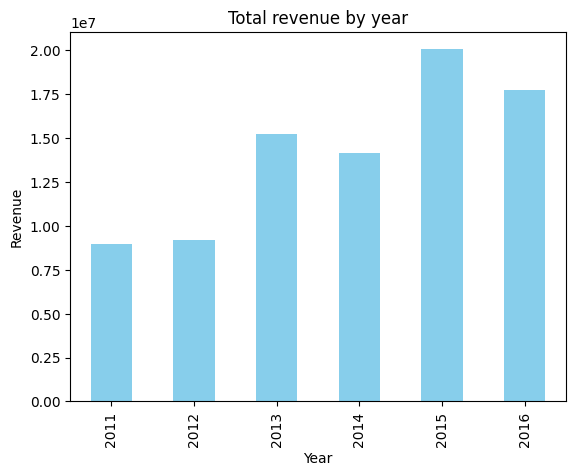

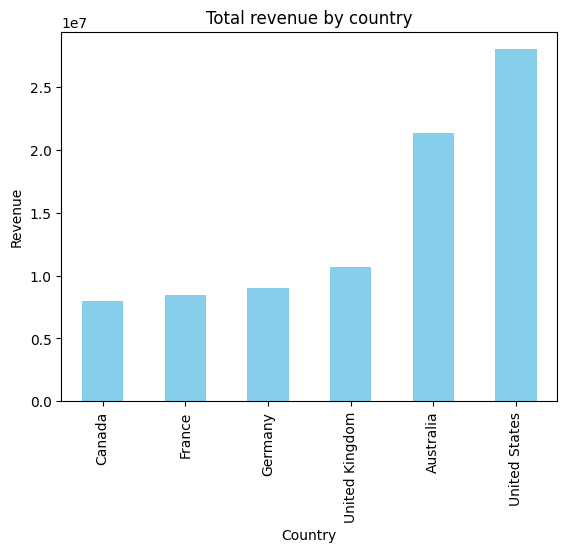

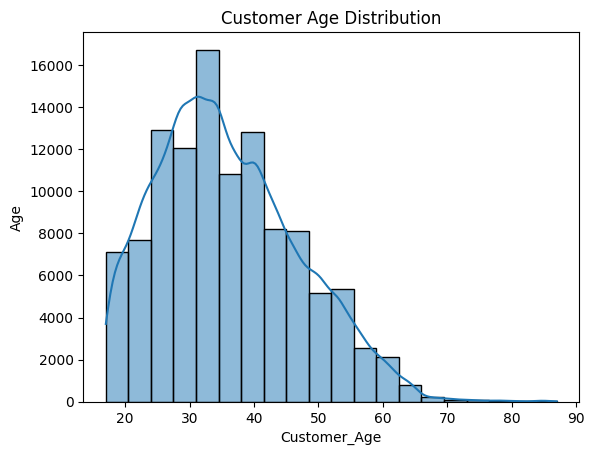

In [ ]:
# Sales by year
df.groupby('Year')['Revenue'].sum().plot(kind='bar', color='skyblue')
plt.title('Total revenue by year')
plt.ylabel('Revenue')
plt.show()

# Sales by country
df.groupby('Country')['Revenue'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Total revenue by country')
plt.ylabel('Revenue')
plt.show()

# Customer age distribution
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.ylabel("Age")
plt.show()

# Bike Sales Data Analysis – Exploratory Data Analysis (EDA) with Pandas

A comprehensive **Exploratory Data Analysis (EDA)** project on bike sales data (113,036 records) using Python and Pandas. The dataset contains detailed sales transactions including customer demographics, product information, order quantities, costs, profits, and revenue across multiple years and countries.

## Project Overview

This project demonstrates practical data cleaning, transformation, aggregation, visualization, and business insights extraction using:

- Pandas for data manipulation
- Matplotlib & Seaborn for visualization
- Basic statistical analysis and correlation

Main questions answered in this analysis:

- What is the total revenue, profit, and cost?
- How do sales trends look over the years (2011–2016)?
- Which countries generate the most revenue?
- Which age groups and genders contribute most to sales?
- What are the seasonal patterns (sales by month)?
- Is there a relationship between order quantity and profit/revenue?

## Dataset

- **Source**: Adapted from FreeCodeCamp Pandas Real-Life Example dataset  
  Raw CSV: https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv
- **Rows**: 113,036
- **Columns**: 18
- **Time period**: 2011–2016
- **Key fields**: Date, Customer_Age, Age_Group, Customer_Gender, Country, Product_Category, Order_Quantity, Unit_Cost, Unit_Price, Profit, Revenue

## Key Findings (Highlights)

- **Total Revenue**: $85,271,008  
- **Total Profit**: $32,221,100  
- **Top Revenue Year**: 2015 (~$20M)
- **Top Revenue Country**: United States (~$28M) → followed by Australia
- **Top Age Group**: Adults (35–64) → ~50% of revenue
- **Gender Split**: Males slightly higher revenue than females
- **Strongest correlation**: Profit & Revenue (r = 0.957)
- **Peak sales months**: December, June, May
- **Weak negative correlation**: Order Quantity ↔ Profit / Revenue (bulk orders don't always mean higher margin)

## Technologies & Libraries

- Python 3.8+
- pandas
- matplotlib
- seaborn
- jupyter / Google Colab (recommended)

## Project Structure

```text
bike-sales-eda/
├── bike_sales_analysis.ipynb     ← Main Jupyter Notebook with full analysis
├── README.md                     ← This file
├── requirements.txt              ← (optional) list of dependencies
└── images/                       ← (optional) exported charts
    ├── revenue_by_year.png
    ├── revenue_by_country.png
    └── age_distribution.png